In [1]:
pip install tomotopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 21.6 MB/s eta 0:00:00


In [2]:
import re
import sys
import string
import tomotopy as tp
from tomotopy import TermWeight
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/datasets_final/ematext.csv'


Mounted at /content/drive


In [4]:
df = pd.read_csv(file_path, encoding="utf-8", encoding_errors="ignore")
#df = df.dropna(subset=['text_manual']).reset_index(drop=True)
df

,uid,resp_time,AVH-Occurrence,Experience-Valence,Experience-Volume,Appraisal-Externality,Appraisal-Control,Appraisal-Power,Affect-Distress,Affect-Anxiety,Affect-Sadness,Experience-Sense-of-Safety,Context-Social,Context-Environment,__user_triggered__,date,intid,Filename,Text
0,3,3/8/2018 14:19,1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,True,3/8/2018 14:19,3,u00000003@avh-20180308-1.txt,I came outside to let our big dog off of his r...
1,3,3/9/2018 10:08,1,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,True,3/9/2018 10:08,3,u00000003@avh-20180309-1.txt,I'm in the car. I was messaging my daughter ab...
2,3,3/16/2018 5:12,1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,True,3/16/2018 5:12,3,u00000003@avh-20180316-1.txt,There's a woman's voice singing an old country...
3,3,3/29/2018 10:54,1,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,False,3/29/2018 10:54,3,u00000003@avh-20180329-1.txt,"So I have got Barry Manilow singing outside, a..."
4,3,3/31/2018 14:24,1,1.0,1.0,3.0,1.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,False,3/31/2018 14:24,3,u00000003@avh-20180331-1.txt,"So we - we, um, have been kind of having a str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2435,10/9/2019 18:54,1,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,3.0,0.0,1.0,False,10/9/2019 18:54,2435,u00002435@avh-20191009-1.txt,"Star date uh, whatever it is. I'm not sure. Bu..."
1914,2435,10/12/2019 13:07,1,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,99.0,1.0,False,10/12/2019 13:07,2435,u00002435@avh-20191012-1.txt,"Okay, check this out. Uh, this is star date 2..."
1915,2435,10/15/2019 7:58,1,1.0,3.0,3.0,0.0,1.0,0.0,3.0,3.0,3.0,0.0,0.0,True,10/15/2019 7:58,2435,u00002435@avh-20191015-1.txt,"Uh, this is Judah King, star date 21,000. At t..."
1916,2435,10/15/2019 10:25,1,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,True,10/15/2019 10:25,2435,u00002435@avh-20191015-2.txt,"Okay, look. Um, star date star date 2019, Octo..."


In [5]:
loud_df = df[['Text','Experience-Volume','uid']]
loud_df = loud_df.dropna().reset_index(drop=True)
loud_df

,Text,Experience-Volume,uid
0,I came outside to let our big dog off of his r...,2.0,3
1,I'm in the car. I was messaging my daughter ab...,3.0,3
2,There's a woman's voice singing an old country...,1.0,3
3,"So I have got Barry Manilow singing outside, a...",0.0,3
4,"So we - we, um, have been kind of having a str...",1.0,3
...,...,...,...
1800,"Star date uh, whatever it is. I'm not sure. Bu...",2.0,2435
1801,"Okay, check this out. Uh, this is star date 2...",0.0,2435
1802,"Uh, this is Judah King, star date 21,000. At t...",3.0,2435
1803,"Okay, look. Um, star date star date 2019, Octo...",0.0,2435


In [6]:
loud_df = pd.DataFrame(loud_df)
loud_df['Experience-Volume'] = loud_df['Experience-Volume'].astype(int)
loud_df['Text'] = loud_df['Text'].astype(str)
loud_df['uid'] = loud_df['uid'].astype(str)
loud_df.reset_index(drop=True)

,Text,Experience-Volume,uid
0,I came outside to let our big dog off of his r...,2,3
1,I'm in the car. I was messaging my daughter ab...,3,3
2,There's a woman's voice singing an old country...,1,3
3,"So I have got Barry Manilow singing outside, a...",0,3
4,"So we - we, um, have been kind of having a str...",1,3
...,...,...,...
1800,"Star date uh, whatever it is. I'm not sure. Bu...",2,2435
1801,"Okay, check this out. Uh, this is star date 2...",0,2435
1802,"Uh, this is Judah King, star date 21,000. At t...",3,2435
1803,"Okay, look. Um, star date star date 2019, Octo...",0,2435


In [7]:
loud_df = loud_df.drop(loud_df[loud_df['Experience-Volume'] == 99].index)
loud_df.reset_index(drop=True)
loud_df['Experience-Volume'].value_counts()

Experience-Volume
2    678
1    612
3    336
0    174
Name: count, dtype: int64

In [8]:
uid_counts = loud_df['uid'].value_counts()
single_count_categories = uid_counts[uid_counts == 1].index.tolist()
single_count_categories

['1043',
 '2209',
 '1042',
 '2203',
 '822',
 '2160',
 '2193',
 '1159',
 '2127',
 '2227',
 '1211',
 '502',
 '136',
 '1027',
 '98',
 '978',
 '2400',
 '2393',
 '60',
 '985',
 '88',
 '2313',
 '1015',
 '2302',
 '123',
 '2278',
 '847',
 '1283',
 '200',
 '803',
 '2035',
 '1295',
 '1832',
 '1894',
 '1893',
 '1515',
 '668',
 '1886',
 '417',
 '1661',
 '1489',
 '1681',
 '1813',
 '488',
 '1802',
 '1682',
 '605',
 '1908',
 '704',
 '1319',
 '373',
 '2045',
 '1320',
 '1715',
 '2031',
 '1325',
 '1337',
 '1339',
 '713',
 '1351',
 '8',
 '1364',
 '1373',
 '392',
 '393',
 '926']

In [9]:
def combine_single_count(df, single_count_categories, new_label):
    df.loc[df['uid'].isin(single_count_categories), 'uid'] = new_label
    return df

loud_df = combine_single_count(loud_df.copy(), single_count_categories, "single_count")

In [10]:
loud_df['uid'].value_counts()

uid
single_count    66
2402            61
1870            56
134             47
1441            41
                ..
1933             2
1954             2
814              2
827              2
967              2
Name: count, Length: 201, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(loud_df[['Text']], loud_df['Experience-Volume'], test_size=0.3, random_state=42, stratify=loud_df['uid'])

In [12]:
train_df = pd.DataFrame({'Text': x_train['Text'], 'score': y_train})

test_df = pd.DataFrame({'Tex': x_test['Text'], 'score': y_test})

In [13]:
train_df

,Text,score
1606,Still using speakers which are in audible on ...,1
489,A male voice has been talking and just talking...,2
1149,"I was at the gym and, uh, I was working out, a...",3
1290,"It's now 9:59 AM on Tuesday. At noon, in about...",3
1278,"So now, about after an hour of talking about t...",2
...,...,...
594,So every time I'm vacuuming or doing something...,2
707,"There are a lot of people, as I've discovered,...",2
1787,"Okay, my friend that I will met at the airport...",1
1561,\n\n,3


In [33]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')



stopWords = set(stopwords.words('english'))
custom_stopwords = ["iãåâ","ive", "thats", "theres", "got", "gon", "na", "get", "uh", "um", "theyre", "youve", "itbs", "hat", "ibm", "donbt", "would", "could", "didnt", "theybre", "içÿ", "wa", "ium", "itus", "im"]

def preprocess_text(text):
  # Lowercase text
  text = text.lower()

  # Tokenize text
  words = nltk.word_tokenize(text)

    # Lemmatization (new)
  lemmatizer = WordNetLemmatizer()
  lemmed_words = [lemmatizer.lemmatize(word) for word in words]

  # Perform POS tagging
  pos_tags = nltk.pos_tag(lemmed_words)

  # Filter words based on stopwords and POS tags
  wordsFiltered = [word for word, pos in pos_tags if word not in stopWords and
                   word not in custom_stopwords and is_valid_pos(pos)]
  return wordsFiltered

# Helper function to identify valid POS tags (verbs, adjectives, nouns)
def is_valid_pos(pos_tag):
  """
  This function checks if a word has a valid POS tag (verb, adjective, noun).
  """
  valid_pos_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ",  # Verbs
                    "JJ", "JJR", "JJS",                        # Adjectives
                    "NN", "NNS", "NNP", "NNPS"]                   # Nouns
  return pos_tag in valid_pos_tags

for _, text, score in train_df.itertuples():
  text = re.sub(r'[^\w\s]', "", str(text))  # Remove non-alphanumeric characters
  wordsFiltered = preprocess_text(text)
  print(wordsFiltered)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['using', 'speaker', 'audible', 'phone', 'remote', 'neuralmonitoring']
['male', 'voice', 'ha', 'talking', 'talking', 'talking', 'talking', 'talking', 'outside', 'head', 'kind', 'background', 'sound', 'kind', 'loud', 'hearable', 'course', 'home', 'watching', 'watching', 'tv', 'kind', 'getting', 'nerve', 'little', 'bit', 'affecting', 'kind', 'negative', 'way', 'kind', 'distracting', 'said', 'watching', 'tv', 'talking', 'babbling', 'kind', 'stupid', 'shit', 'apologize', 'dont', 'mean', 'curse', 'whats', 'going', 'right', 'thank', 'time']
['gym', 'working', 'voice', 'used', 'tactile', 'hallucination', 'start', 'hurting', 'lot', 'like', 'used', 'tactile', 'hallucination', 'hurt', 'give', 'cut', 'make', 'burn', 'hurt', 'inside', 'outside', 'soi', 'uhlike', 'minute', 'go', 'home', 'tell', 'voice', 'come', 'stuff', 'thatll', 'help', 'research']
['tuesday', 'noon', 'hour', 'oclock', 'need', 'leave', 'go', 'provider', 'luke', 'dorf', 'supposed', 'meeting', 'caseworker', 'counselor', 'ruda', 'mor

In [43]:
s_lda_model = tp.SLDAModel(tw=TermWeight.IDF, k=5, alpha=1, vars = 'l', eta=0.01)

In [44]:
for _, text, score in train_df.itertuples():
  text = re.sub(r'[^\w\s]', "", str(text))  # Remove non-alphanumeric characters
  wordsFiltered = preprocess_text(text)

  s_lda_model.add_doc(words=wordsFiltered, y=[score])

In [45]:
s_lda_model.burn_in = 100
s_lda_model.train(0)
print('Num docs:', len(s_lda_model.docs), ', Vocab size:', len(s_lda_model.used_vocabs), ', Num words:', s_lda_model.num_words)
print('Removed top words:', s_lda_model.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 1000, 10):
    s_lda_model.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, s_lda_model.ll_per_word))

s_lda_model.summary()
# print('Saving...', file=sys.stderr, flush=True)
# mdl.save(save_path, True)

for k in range(s_lda_model.k):
    print('Topic #{}'.format(k))
    for word, prob in s_lda_model.get_topic_words(k):
        print('\t', word, prob, sep='\t')

Training...


Num docs: 1237 , Vocab size: 7306 , Num words: 76221
Removed top words: []
Iteration: 0	Log-likelihood: -8.454686254709697
Iteration: 10	Log-likelihood: -8.339414138566493
Iteration: 20	Log-likelihood: -8.281227004916035
Iteration: 30	Log-likelihood: -8.23788092317864
Iteration: 40	Log-likelihood: -8.213559839052444
Iteration: 50	Log-likelihood: -8.199577822121938
Iteration: 60	Log-likelihood: -8.182373475830008
Iteration: 70	Log-likelihood: -8.170061917524832
Iteration: 80	Log-likelihood: -8.166146494505165
Iteration: 90	Log-likelihood: -8.158623562358134
Iteration: 100	Log-likelihood: -8.146909738760817
Iteration: 110	Log-likelihood: -8.140376114367111
Iteration: 120	Log-likelihood: -8.127609935783003
Iteration: 130	Log-likelihood: -8.119658627796564
Iteration: 140	Log-likelihood: -8.11594322486737
Iteration: 150	Log-likelihood: -8.109503463161742
Iteration: 160	Log-likelihood: -8.099401318378224
Iteration: 170	Log-likelihood: -8.094595022634602
Iteration: 180	Log-likelihood: -8.0859

In [46]:
s_lda_model.get_topic_word_dist(0)

array([6.0716235e-07, 6.0684044e-07, 6.0688745e-07, ..., 6.0682237e-07,
       6.0682237e-07, 6.0682237e-07], dtype=float32)

In [19]:
#infer_test = "I'm laying in bed right now thinking how the voices have subsided a lot over the last two days. I'm not hearing as much stuff and, um, there's no reason why I need to panic about being hospitalized or whatever. Saw my doctor on Monday and she seems to think I need to up my Abilify, and she said it'll take four weeks for it to make a difference. I've only been on it like four or five days, so it's not gonna make a difference yet, uh, enough to notice. So but I'm happy she made a difference. It's just I'm unhappy 'cause I'm kind of depressed, and she wouldn't Ã¢€“ basically she wouldn't change my antidepressant for another one. So I don't know. She says the Abilify will help the depression. So I'm hoping that the case. Uh, she also gave me Cogentin because I was shaking from the Abilify so that I don't get tremors. She also said that I'm hypo Ã¢€“ I have hypothyroidism possibly which could explain why I'm not shedding any weight even though I've been dieting lately and I was working out regularly. Um, so that's another good thing that maybe they could figure out and I could get on medication and Ã¢€“ but the voices, the voices they're going Ã¢€“ they're going away now completely. And I'm lucky and blessed to say that, and, um, I'm hoping by tomorrow morning when I wake up there's no more voices. That's my goal and my, my hope is that this means that it's going away for good and I don't have to worry about it. That's my hope, and that's all I can say about that. Um, you know, hope, hope is good. Especially when it comes to this, hope is good. And I'm excited for the study to end so I can get my gift card, too. Thanks."
#infer_test = re.sub(r'[^\w\s]', "", infer_test)
#words = word_tokenize(infer_test)
#wordsFiltered = [re.sub(r'[^\w\s]', "", w.lower()) for w in words if w not in string.punctuation]
#print(wordsFiltered)

#doc_inst = s_lda_model.make_doc(wordsFiltered, y=[1])
#topic_dist, ll = s_lda_model.infer(doc_inst)
#hpsvq_severity = s_lda_model.estimate(doc_inst)
#print("Topic Distribution for Unseen Docs: ", topic_dist)
#print("Log-likelihood of inference: ", ll)
#print("EMA score Severity: ", hpsvq_severity[0])

In [47]:
doc_inst=[]

for _, text, score in test_df.itertuples():
    text = re.sub(r'[^\w\s]', "", str(text))
    wordsFiltered = preprocess_text(text)

    doc_inst.append(s_lda_model.make_doc(words=str(wordsFiltered), y=[score]))

topic_dist, ll = s_lda_model.infer(doc_inst)
ema_score_pred = s_lda_model.estimate(doc_inst)
print("Topic Distribution for Unseen Docs: ", topic_dist)
print("Log-likelihood of inference: ", ll)
print("Predictions of Severity of Unseen Docs: ", ema_score_pred)

<ipython-input-47-7f5d9899363d>:7: RuntimeWarning: `words` should be an iterable of str.
  doc_inst.append(s_lda_model.make_doc(words=str(wordsFiltered), y=[score]))


Topic Distribution for Unseen Docs:  [array([5.5696625e-01, 3.1136948e-01, 3.4304855e-03, 2.1455588e-04,
       1.2801933e-01], dtype=float32), array([5.2642088e-02, 9.4457477e-01, 1.4519404e-03, 9.0808644e-05,
       1.2410430e-03], dtype=float32), array([1.1891245e-04, 9.7688150e-01, 2.0216638e-03, 1.2644270e-04,
       2.0851487e-02], dtype=float32), array([0.32139203, 0.60652095, 0.00362939, 0.06535566, 0.00310228],
      dtype=float32), array([4.1668332e-05, 8.4895677e-05, 9.7924072e-01, 2.0024335e-02,
       6.0554780e-04], dtype=float32), array([4.4272350e-05, 4.7805519e-03, 9.9001580e-01, 4.7077796e-05,
       5.1097190e-03], dtype=float32), array([2.0775283e-04, 4.6878076e-01, 3.5320639e-03, 5.2446067e-01,
       3.0190686e-03], dtype=float32), array([8.6370434e-05, 5.2242011e-01, 3.5946015e-01, 1.1677866e-01,
       1.2551377e-03], dtype=float32), array([3.01347170e-02, 7.78985858e-01, 1.65967038e-03, 1.03799204e-04,
       1.89116225e-01], dtype=float32), array([1.5316538e-0

In [48]:
s_lda_model.perplexity

2856.1108713060335

In [49]:
score_str = [arr[0] for arr in ema_score_pred]
data = list(zip(score_str, test_df['score']))
compare = pd.DataFrame(data, columns=["Predicted", "Actual"])

In [50]:
compare

,Predicted,Actual
0,1.818617,3
1,1.754674,2
2,1.759553,1
3,1.737391,2
4,1.215330,1
...,...,...
535,1.217443,3
536,1.293758,0
537,1.212896,2
538,1.772386,2


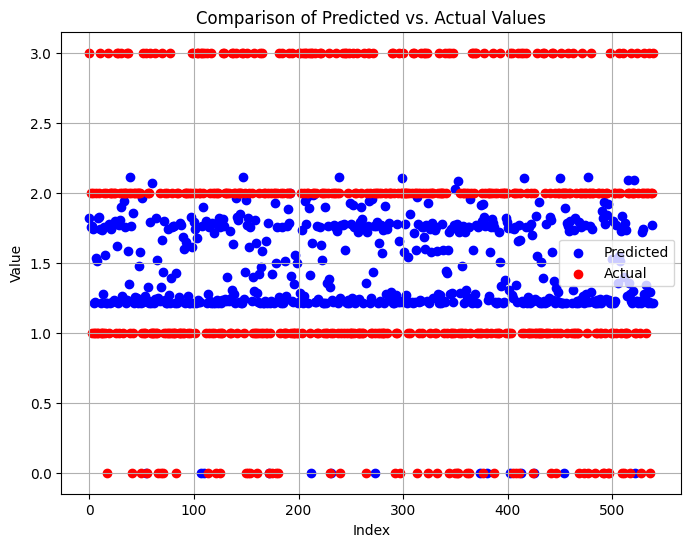

In [51]:
#save_path = '/content/drive/My Drive/Colab Notebooks/ema_loud_model.bin'
#import pandas as pd
#s_lda_model.save(save_path)

import matplotlib.pyplot as plt

# Color list for the scatter plot (choose colors you prefer)
predicted_color = 'blue'
actual_color = 'red'

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(compare.index, compare['Predicted'], label='Predicted', c=predicted_color)
plt.scatter(compare.index, compare['Actual'], label='Actual', c=actual_color)

# Label the axes
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Predicted vs. Actual Values')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [52]:
save_path = '/content/drive/My Drive/Colab Notebooks/ema_loud_model.bin'

s_lda_model.save(save_path)